In [3]:
import numpy as np
import pandas as pd
import os
import gzip
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 4.2 Анализ текста сообщений (продолжение)

Смотрим на столбец `serv_mess`

In [5]:
# vibo: читаем (index_col=0 считываем индексы тоже)
data_logs = pd.read_csv('/content/drive/MyDrive/minecraft/logs.csv', index_col=0)
summary = pd.read_csv('/content/drive/MyDrive/minecraft/summary.csv', index_col=0)

In [6]:
summary[['date', 'time', 'serv_teg_inf', 'serv_mess']].describe()

,date,time,serv_teg_inf,serv_mess
count,6092,6092,6092,6092
unique,10,1285,5,913
top,2023-03-04,21:13:39,Server thread,Preparing spawn area: 0%
freq,1018,115,5003,674


In [7]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6092 entries, 0 to 6581
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       6092 non-null   object 
 1   time                       6092 non-null   object 
 2   serv_teg_inf               6092 non-null   object 
 3   serv_teg                   6092 non-null   object 
 4   serv_mess                  6092 non-null   object 
 5   user_authenticator_number  93 non-null     float64
 6   worker_main_number         891 non-null    float64
 7   async_chat_thread_number   19 non-null     float64
dtypes: float64(3), object(5)
memory usage: 428.3+ KB


## 4.2.1 Server thread

Смотрим на сообщения в категории `Server thread`

In [8]:
summary[summary['serv_teg_inf'] == 'Server thread']

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
9,2023-02-13,21:34:07,Server thread,INFO,Starting minecraft server version 1.19.2,NaN,NaN,NaN
10,2023-02-13,21:34:07,Server thread,INFO,Loading properties,NaN,NaN,NaN
11,2023-02-13,21:34:07,Server thread,INFO,This server is running CraftBukkit version 36...,NaN,NaN,NaN
12,2023-02-13,21:34:07,Server thread,INFO,Debug logging is disabled,NaN,NaN,NaN
13,2023-02-13,21:34:07,Server thread,INFO,Server Ping Player Sample Count: 12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6576,2023-03-09,18:45:12,Server thread,INFO,ARTEXX left the game,NaN,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN


In [9]:
summary[summary['serv_teg_inf'] == 'Server thread'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 9 to 6581
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       5003 non-null   object 
 1   time                       5003 non-null   object 
 2   serv_teg_inf               5003 non-null   object 
 3   serv_teg                   5003 non-null   object 
 4   serv_mess                  5003 non-null   object 
 5   user_authenticator_number  0 non-null      float64
 6   worker_main_number         0 non-null      float64
 7   async_chat_thread_number   0 non-null      float64
dtypes: float64(3), object(5)
memory usage: 351.8+ KB


Видно, что последние три столбца из рассмотрения можно сразу исключить, выделим данные в отдельный датафрейм



In [10]:
sub_summary = summary[summary['serv_teg_inf'] == 'Server thread'][['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']]
sub_summary

,date,time,serv_teg_inf,serv_teg,serv_mess
9,2023-02-13,21:34:07,Server thread,INFO,Starting minecraft server version 1.19.2
10,2023-02-13,21:34:07,Server thread,INFO,Loading properties
11,2023-02-13,21:34:07,Server thread,INFO,This server is running CraftBukkit version 36...
12,2023-02-13,21:34:07,Server thread,INFO,Debug logging is disabled
13,2023-02-13,21:34:07,Server thread,INFO,Server Ping Player Sample Count: 12
...,...,...,...,...,...
6576,2023-03-09,18:45:12,Server thread,INFO,ARTEXX left the game
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand


In [11]:
sub_summary[sub_summary['serv_teg_inf'] == 'Server thread'].describe()

,date,time,serv_teg_inf,serv_teg,serv_mess
count,5003,5003,5003,5003,5003
unique,10,1028,1,2,782
top,2023-03-04,21:13:39,Server thread,INFO,Custom Map Seeds: Village: 10387312 Desert: ...
freq,845,115,5003,4853,84


Самые популярные сообщения в категории `Server thread`

In [12]:
# vibo: найдем самые популярные сообщения в категории
summary[summary['serv_teg_inf'] == 'Server thread']['serv_mess'].value_counts()

 Custom Map Seeds:  Village: 10387312 Desert: 14357617 Igloo: 14357618 Jungle: 14357619 Swamp: 14357620 Monument: 10387313 Ocean: 14357621 Shipwreck: 165745295 End City: 10387313 Slime: 987234911 Nether: 30084232 Mansion: 10387319 Fossil: 14357921 Portal: 34222645    84
 Nerfing mobs spawned from spawners: false                                                                                                                                                                                                                                  84
 Sapling Growth Modifier: 100%                                                                                                                                                                                                                                              84
 Beetroot Growth Modifier: 100%                                                                                                                                                            

In [13]:
sub_summary

,date,time,serv_teg_inf,serv_teg,serv_mess
9,2023-02-13,21:34:07,Server thread,INFO,Starting minecraft server version 1.19.2
10,2023-02-13,21:34:07,Server thread,INFO,Loading properties
11,2023-02-13,21:34:07,Server thread,INFO,This server is running CraftBukkit version 36...
12,2023-02-13,21:34:07,Server thread,INFO,Debug logging is disabled
13,2023-02-13,21:34:07,Server thread,INFO,Server Ping Player Sample Count: 12
...,...,...,...,...,...
6576,2023-03-09,18:45:12,Server thread,INFO,ARTEXX left the game
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand


### **Количество успешных запусков сервера**

Посмотрим, что из себя представляют сообщения в этой категории. Начинаются они с сообщения о том, что сервер стартует. Найдем количество запусков сервера дням.

In [14]:
df_is_start = sub_summary['serv_mess'].map(lambda x: 'Starting minecraft server' in x).to_frame(name='is_start')
ind_is_start = df_is_start[df_is_start['is_start'] == True].index
len(ind_is_start)

27

In [15]:
plot_df = sub_summary[sub_summary.index.isin(ind_is_start)][['date', 'serv_mess']].groupby(['date']).count().reset_index()
plot_df['%'] = plot_df['serv_mess'] * 100 / plot_df['serv_mess'].sum()
plot_df['%'] = plot_df['%'].round(2)
plot_df

,date,serv_mess,%
0,2023-02-13,3,11.11
1,2023-02-14,2,7.41
2,2023-02-17,1,3.70
3,2023-03-03,3,11.11
4,2023-03-04,5,18.52
5,2023-03-05,3,11.11
6,2023-03-06,4,14.81
7,2023-03-07,1,3.70
8,2023-03-08,3,11.11
9,2023-03-09,2,7.41


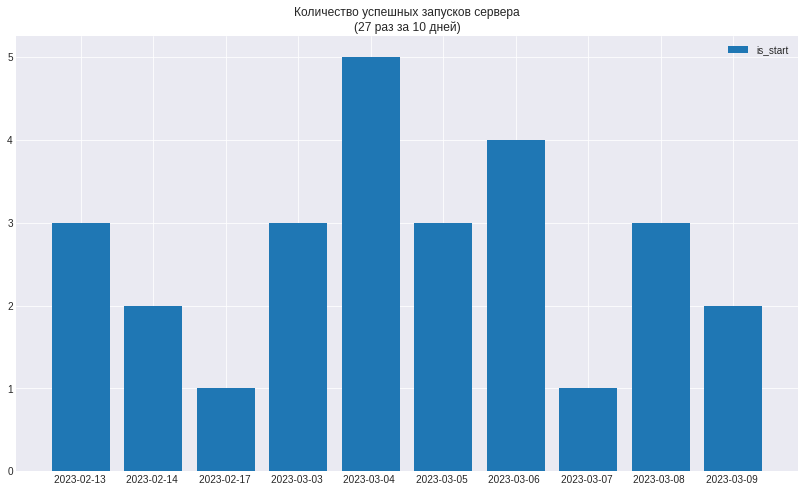

In [16]:
# vibo: data
groups_x = plot_df['date'].values
values_y = plot_df['serv_mess'].values

# vibo: bar chart whith total value labels
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))
  ax.bar(groups_x, values_y, label = "is_start")

  # for i, total in enumerate(values_y):
  #   ax.text(i, total + 0.1, values_y[i], ha='center')

  plt.title(f'Количество успешных запусков сервера\n({sum(values_y)} раз за {len(groups_x)} дней)')
  ax.legend(loc='best')
  # ax.set_xlabel('Дата')
  # ax.set_ylabel('Количество')
  plt.show()
  # fig.savefig('saved_figure.png', dpi = 400)

После начала запуска сервера идет блок сообщений о загрузке свойств: `World Settings For [world]`, `World Settings For [world_nether]`,  `World Settings For [world_the_end]`. Этот блок заканчивается сообщением `Done`. Найдем их.

In [17]:
# vibo: сохраним, понадобится ниже
groups_x_is_start = plot_df['date'].values
values_y_is_start = plot_df['serv_mess'].values

In [18]:
sub_summary

,date,time,serv_teg_inf,serv_teg,serv_mess
9,2023-02-13,21:34:07,Server thread,INFO,Starting minecraft server version 1.19.2
10,2023-02-13,21:34:07,Server thread,INFO,Loading properties
11,2023-02-13,21:34:07,Server thread,INFO,This server is running CraftBukkit version 36...
12,2023-02-13,21:34:07,Server thread,INFO,Debug logging is disabled
13,2023-02-13,21:34:07,Server thread,INFO,Server Ping Player Sample Count: 12
...,...,...,...,...,...
6576,2023-03-09,18:45:12,Server thread,INFO,ARTEXX left the game
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand


In [19]:
df_done = sub_summary['serv_mess'].map(lambda x: 'Done' in x).to_frame(name='done')
ind_done = df_done[df_done['done'] == True].index
len(ind_done)

27

In [20]:
ind_done

Int64Index([ 222,  392,  565,  739,  913, 1094, 1380, 1587, 1818, 1984, 2188,
            2364, 2525, 2686, 3009, 3179, 3492, 3861, 4244, 4502, 4735, 4977,
            5310, 5608, 6026, 6233, 6531],
           dtype='int64')

In [21]:
plot_df = sub_summary[sub_summary.index.isin(ind_done)]
plot_df.head()

,date,time,serv_teg_inf,serv_teg,serv_mess
222,2023-02-13,21:35:13,Server thread,INFO,"Done (66.075s)! For help, type ""help"""
392,2023-02-13,21:36:58,Server thread,INFO,"Done (12.374s)! For help, type ""help"""
565,2023-02-13,21:59:54,Server thread,INFO,"Done (12.742s)! For help, type ""help"""
739,2023-02-14,20:46:06,Server thread,INFO,"Done (15.752s)! For help, type ""help"""
913,2023-02-14,23:48:28,Server thread,INFO,"Done (13.669s)! For help, type ""help"""


### **Время запуска сервера**

Выделим информацию о времени запуска сервера в секундах, самый первый запуск был самым продолжительным

In [22]:
plot_df['starting_time'] = plot_df['serv_mess'].map(lambda x: x.split()[1][1:-3])
plot_df.head()

<ipython-input-22-ec7413555aa7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['starting_time'] = plot_df['serv_mess'].map(lambda x: x.split()[1][1:-3])


,date,time,serv_teg_inf,serv_teg,serv_mess,starting_time
222,2023-02-13,21:35:13,Server thread,INFO,"Done (66.075s)! For help, type ""help""",66.075
392,2023-02-13,21:36:58,Server thread,INFO,"Done (12.374s)! For help, type ""help""",12.374
565,2023-02-13,21:59:54,Server thread,INFO,"Done (12.742s)! For help, type ""help""",12.742
739,2023-02-14,20:46:06,Server thread,INFO,"Done (15.752s)! For help, type ""help""",15.752
913,2023-02-14,23:48:28,Server thread,INFO,"Done (13.669s)! For help, type ""help""",13.669


In [23]:
# vibo: приведем новый столбец к float
plot_df['starting_time'] = plot_df['starting_time'].astype(float)

<ipython-input-23-e8458d34d553>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['starting_time'] = plot_df['starting_time'].astype(float)


In [24]:
plot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 222 to 6531
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           27 non-null     object 
 1   time           27 non-null     object 
 2   serv_teg_inf   27 non-null     object 
 3   serv_teg       27 non-null     object 
 4   serv_mess      27 non-null     object 
 5   starting_time  27 non-null     float64
dtypes: float64(1), object(5)
memory usage: 1.5+ KB


Из таблицы ниже видим среднее время запуска сервера, минимальное, максимальное, и др. статистические показатели

In [25]:
plot_df['starting_time'].describe()

count    27.000000
mean     18.072667
std      10.680711
min      12.374000
25%      13.724000
50%      14.604000
75%      15.552500
max      66.075000
Name: starting_time, dtype: float64

In [26]:
med_starting = plot_df['starting_time'].describe()['50%']
med_starting

14.604

In [27]:
plot_df[['date', 'starting_time']].groupby(['date'])['starting_time'].agg('mean')

date
2023-02-13     30.397000
2023-02-14     14.710500
2023-02-17     13.316000
2023-03-03     17.574667
2023-03-04     15.666200
2023-03-05     14.083000
2023-03-06     15.032250
2023-03-07     14.483000
2023-03-08     19.753000
2023-03-09     23.429500
Name: starting_time, dtype: float64

Для визуализиции результатов по времени запуска будем использовать медианные значения. 

In [28]:
plot_df = plot_df[['date', 'starting_time']].groupby(['date'])['starting_time'].agg('median').to_frame(name='time_starting_median').reset_index()
plot_df

,date,time_starting_median
0,2023-02-13,12.7420
1,2023-02-14,14.7105
2,2023-02-17,13.3160
3,2023-03-03,14.4760
4,2023-03-04,13.4520
5,2023-03-05,14.2170
6,2023-03-06,15.0560
7,2023-03-07,14.4830
8,2023-03-08,19.2000
9,2023-03-09,23.4295


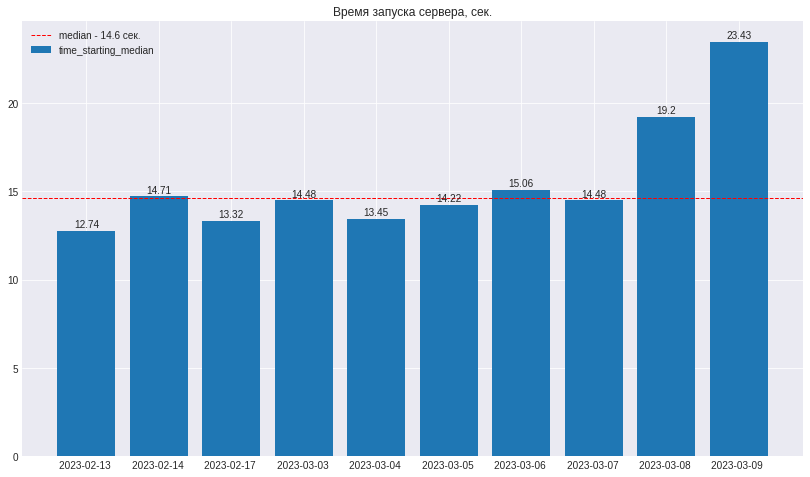

In [29]:
# vibo: data
groups_x = plot_df['date'].values
values_y = plot_df['time_starting_median'].values

# vibo: bar chart whith total value labels
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))
  ax.bar(groups_x, values_y, label = "time_starting_median")

  plt.axhline(y=med_starting, color='red', linestyle='--', linewidth=1, label=f'median - {round(med_starting, 1)} сек.')

  for i, total in enumerate(values_y):
    ax.text(i, total + 0.2, round(values_y[i], 2), ha='center')

  plt.title(f'Время запуска сервера, сек.')
  ax.legend(loc='best')
  # ax.set_xlabel('Дата')
  # ax.set_ylabel('Время, сек')
  plt.show()

### **Количество корректных остановок сервера (с успешным сохранением)**

Корректная остановка работы сервера осуществляется из консоли сервера или из консоли игрока с правом доступа (op) командой `stop`. Это штатный режим завершения работы за которым идет сохранение параметров. Найдем когда сервер останавливался. Остановка сервера начинается с сообщения "Stopping the server".

In [30]:
df_is_stop = sub_summary['serv_mess'].map(lambda x: 'Stopping the server' in x).to_frame(name='is_stop')
ind_is_stop = df_is_stop[df_is_stop['is_stop'] == True].index
len(ind_is_stop)

11

In [31]:
plot_df = sub_summary[sub_summary.index.isin(ind_is_stop)][['date', 'serv_mess']].groupby(['date']).count().reset_index()
plot_df

,date,serv_mess
0,2023-02-13,1
1,2023-02-14,2
2,2023-02-17,1
3,2023-03-03,2
4,2023-03-04,1
5,2023-03-06,3
6,2023-03-09,1


In [32]:
# vibo: у нас есть три дня, когда сервер корректно не выключался
find_days = set(groups_x_is_start) - set(plot_df['date'].values)
find_days

{'2023-03-05 ', '2023-03-07 ', '2023-03-08 '}

In [33]:
# vibo: создадим датафрейм
df_find_days = pd.DataFrame({'date': list(find_days)})
df_find_days

,date
0,2023-03-05
1,2023-03-07
2,2023-03-08


In [34]:
# vibo: добавляем дни без корректного завершения в датафрейм
plot_df = plot_df.append(df_find_days, ignore_index=True)
plot_df = plot_df.fillna(0)
plot_df = plot_df.sort_values('date')
plot_df

<ipython-input-34-cad278c68816>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(df_find_days, ignore_index=True)


,date,serv_mess
0,2023-02-13,1.0
1,2023-02-14,2.0
2,2023-02-17,1.0
3,2023-03-03,2.0
4,2023-03-04,1.0
7,2023-03-05,0.0
5,2023-03-06,3.0
8,2023-03-07,0.0
9,2023-03-08,0.0
6,2023-03-09,1.0


In [35]:
df_save_is_ok = sub_summary['serv_mess'].map(lambda x: 'All dimensions are saved' in x).to_frame(name='save_is_ok')
ind_save_is_ok = df_save_is_ok[df_save_is_ok['save_is_ok'] == True].index
len(ind_save_is_ok)

11

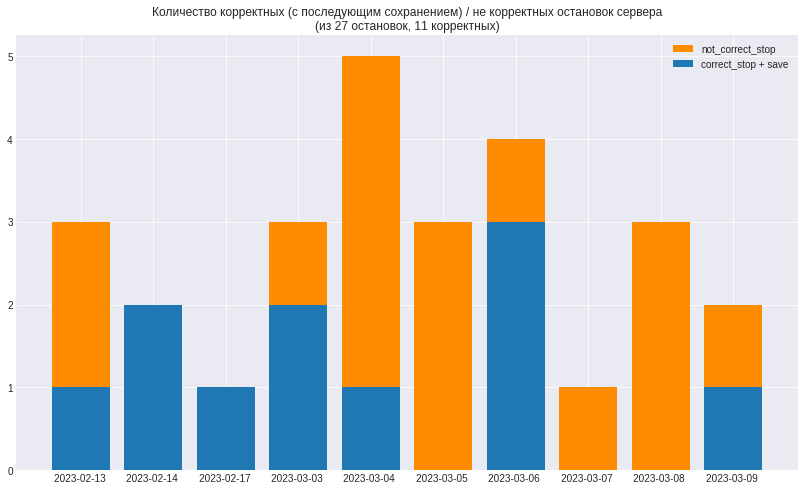

In [38]:
# vibo: data
groups_x_is_corr_stop = plot_df['date'].values
groups_y_is_corr_stop = plot_df['serv_mess'].values

# vibo: bar chart whith total value labels
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))
  ax.bar(groups_x_is_start, values_y_is_start, label = "not_correct_stop", color='darkorange')
  ax.bar(groups_x_is_corr_stop, groups_y_is_corr_stop, label = "correct_stop + save")

  # for i, total in enumerate(values_y):
  #   ax.text(i, total + 0.1, values_y[i], ha='center')

  plt.title(f'Количество корректных (с последующим сохранением) / не корректных остановок сервера\n(из {sum(values_y_is_start)} остановок, {len(ind_save_is_ok)} корректных)')
  ax.legend(loc='best')
  # ax.set_xlabel('Дата')
  # ax.set_ylabel('Количество')
  plt.show()

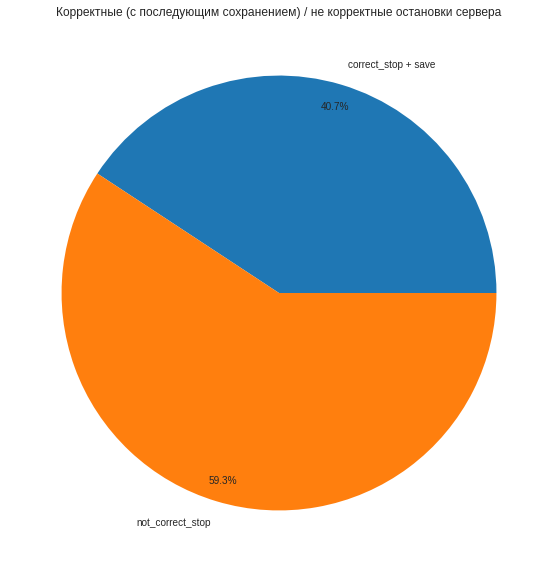

In [41]:
labels = ['correct_stop + save', 'not_correct_stop']
value = [len(ind_save_is_ok), sum(values_y_is_start) - len(ind_save_is_ok)]

# vibo: pie chart
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(10, 10))
  explode = [0, 0]
  ax.pie(value, labels=labels, pctdistance=0.9, explode=explode, autopct='%1.1f%%', labeldistance=1.1)

  plt.title(f'Корректные (с последующим сохранением) / не корректные остановки сервера')
  # ax.legend(loc='best')
  plt.show()

### **user join**

Когда пользователь проходит аутентификацию и заходит в игру это событие фиксируется сообщением `join` с указанием имени пользователя.

In [42]:
# vibo: смотрим сколько раз появлялось сообщение join
sub_summary['is_user_join'] = sub_summary['serv_mess'].map(lambda x: 'join' in x)
ind_user_join = sub_summary[sub_summary['is_user_join'] == True].index
len(ind_user_join)

88

In [43]:
sub_summary[sub_summary.index.isin(ind_user_join)]

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join
394,2023-02-13,21:49:48,Server thread,INFO,vibO joined the game,True
567,2023-02-13,22:01:25,Server thread,INFO,vibO joined the game,True
915,2023-02-14,23:53:33,Server thread,INFO,vibO joined the game,True
1096,2023-02-17,19:05:26,Server thread,INFO,YOUTUBE_plaY joined the game,True
1102,2023-02-17,19:07:53,Server thread,INFO,YOUTUBE_plaY joined the game,True
...,...,...,...,...,...,...
6536,2023-03-09,17:58:28,Server thread,INFO,ARTEXX joined the game,True
6541,2023-03-09,18:01:54,Server thread,INFO,ARTEEXX joined the game,True
6547,2023-03-09,18:04:00,Server thread,INFO,AARRTTEEXX joined the game,True
6554,2023-03-09,18:16:03,Server thread,INFO,ARTEXX joined the game,True


Выделим имена тех, кто присоединился к игре

In [95]:
plot_df = sub_summary[sub_summary.index.isin(ind_user_join)]
plot_df['user_name'] = plot_df['serv_mess'].map(lambda x: x.split()[0])
plot_df = plot_df[['date', 'time', 'user_name']]
plot_df

<ipython-input-95-3fa95463e37a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['user_name'] = plot_df['serv_mess'].map(lambda x: x.split()[0])


,date,time,user_name
394,2023-02-13,21:49:48,vibO
567,2023-02-13,22:01:25,vibO
915,2023-02-14,23:53:33,vibO
1096,2023-02-17,19:05:26,YOUTUBE_plaY
1102,2023-02-17,19:07:53,YOUTUBE_plaY
...,...,...,...
6536,2023-03-09,17:58:28,ARTEXX
6541,2023-03-09,18:01:54,ARTEEXX
6547,2023-03-09,18:04:00,AARRTTEEXX
6554,2023-03-09,18:16:03,ARTEXX


Сколько раз заходили в игру по дням

In [96]:
plot_df[['date', 'user_name', 'time']].groupby(['date', 'user_name'])['time'].count()

date         user_name       
2023-02-13   vibO                 2
2023-02-14   vibO                 1
2023-02-17   YOUTUBE_plaY         5
             vibo                 3
2023-03-03   LOLOTUK              2
             YOUTUBE_plaY         1
             rex                  3
2023-03-04   rex                  3
2023-03-05   YOUTUBE_plaY         3
             amogoos              7
             amogoos_red          1
             amogoos_red15050     1
             gggggg102            1
             testing1             1
             vibo                 3
2023-03-06   amogoos              2
             testing1            13
             testing2             7
             testing3             1
             testing4             1
2023-03-07   Fredi                3
             amogoos              3
             gggggg102            2
             test_name_1          1
             testing1             1
2023-03-08   Umni4ok100200        1
             aaaaa                

In [97]:
plot_df = plot_df.groupby(['date'])['date'].count().to_frame(name='count_join').reset_index()
plot_df

,date,count_join
0,2023-02-13,2
1,2023-02-14,1
2,2023-02-17,8
3,2023-03-03,6
4,2023-03-04,3
5,2023-03-05,17
6,2023-03-06,24
7,2023-03-07,10
8,2023-03-08,10
9,2023-03-09,7


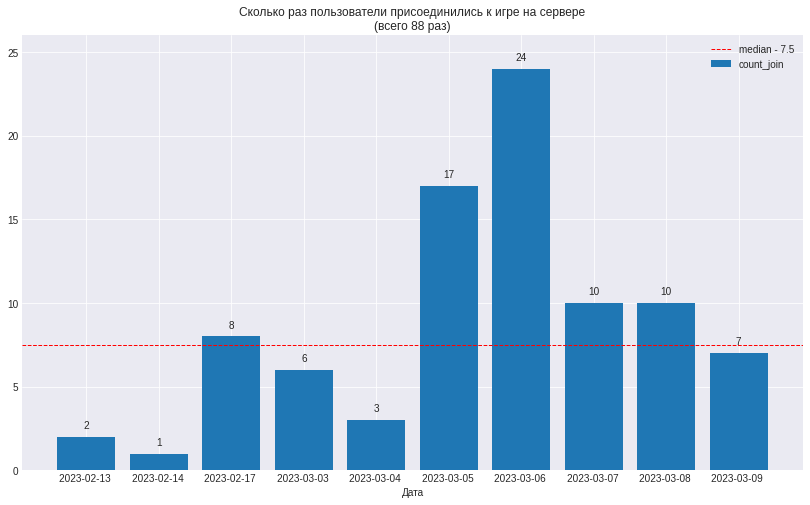

In [98]:
# vibo: data
groups_x = plot_df['date'].values
values_y = plot_df['count_join'].values
med_join = plot_df['count_join'].describe()['50%']

# vibo: bar chart whith total value labels
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))
  ax.bar(groups_x, values_y, label = "count_join")

  for i, total in enumerate(values_y):
    ax.text(i, total + 0.5, values_y[i], ha='center')
  
  plt.axhline(y=med_join, color='red', linestyle='--', linewidth=1, label=f'median - {med_join}')

  plt.title(f'Сколько раз пользователи присоединились к игре на сервере\n(всего {sum(values_y)} раз)')
  ax.legend(loc='best')
  ax.set_xlabel('Дата')
  ax.set_ylim(0, 26)
  # ax.set_ylabel('Количество')
  plt.show()

Сравнивая графики аутентификации пользователей и заходов непосредственно в игру видно, что они не совпадают. Так происходит когда пользователь с указанным ником был поставлен в стоп-лист, т.е. сервер успешно проводит аутентификацию пользователя, видит, что он в стоп-листе и не дает присоединиться к игре. Считая разницу между количеством аутентификаций игроков и показателем `join` можно опосредовано найти количество попыток попасть на сервер после блокировки. Ниже пример в котором видно, как проходит аутентификация пользователя, а затем идет сообщение о разъединении (`Disconnecting`).

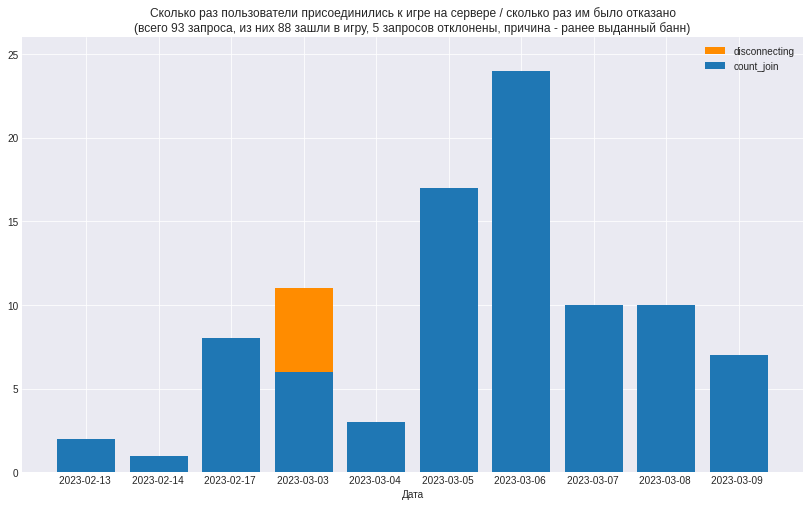

In [100]:
# vibo: data
groups_x = plot_df['date'].values
values_y = plot_df['count_join'].values

plot_df_auth = summary[summary['serv_teg_inf'] == 'User Authenticator'].groupby(['date'])['date'].count().to_frame(name='count_authent').reset_index()
groups_x_auth = plot_df_auth['date'].values
values_y_auth = plot_df_auth['count_authent'].values

# vibo: bar chart whith total value labels
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))
  ax.bar(groups_x_auth, values_y_auth, label = "disconnecting", color='darkorange')
  ax.bar(groups_x, values_y, label = "count_join")

  # for i, total in enumerate(values_y):
  #   ax.text(i, total + 0.5, values_y[i], ha='center')
  
  # plt.axhline(y=med_join, color='red', linestyle='--', linewidth=1, label=f'median - {med_join}')

  plt.title(f'Сколько раз пользователи присоединились к игре на сервере / сколько раз им было отказано\n(всего {sum(values_y_auth)} запроса, из них {sum(values_y)} зашли в игру, {sum(values_y_auth) - sum(values_y)} запросов отклонены, причина - ранее выданный банн)')
  ax.legend(loc='best')
  ax.set_xlabel('Дата')
  ax.set_ylim(0, 26)
  # ax.set_ylabel('Количество')
  plt.show()

In [101]:
# vibo: сделаем копию для следующего графика
groups_x_join_day = groups_x.copy()
values_y_join_day = values_y.copy()

In [102]:
groups_x_join_day

array(['2023-02-13 ', '2023-02-14 ', '2023-02-17 ', '2023-03-03 ',
       '2023-03-04 ', '2023-03-05 ', '2023-03-06 ', '2023-03-07 ',
       '2023-03-08 ', '2023-03-09 '], dtype=object)

In [75]:
values_y_join_day

array([ 2,  1,  8,  6,  3, 17, 24, 10, 10,  7])

In [103]:
# vibo: разъединение после аутентификации
data_logs.loc[1608:1616]

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess
1608,2023-03-03,19:20:08,User Authenticator,INFO,UUID of player YOUTUBE_plaY is 56eb670a-4ed0-...,4.0,NaN,NaN,NaN,NaN
1609,2023-03-03,19:20:08,Server thread,INFO,Disconnecting com.mojang.authlib.GameProfile@...,NaN,NaN,NaN,NaN,NaN
1611,2023-03-03,19:20:08,Server thread,INFO,com.mojang.authlib.GameProfile@1b6db9f2[id=56...,NaN,NaN,NaN,NaN,NaN
1613,2023-03-03,19:21:12,User Authenticator,INFO,UUID of player YOUTUBE_plaY is 56eb670a-4ed0-...,5.0,NaN,NaN,NaN,NaN
1614,2023-03-03,19:21:12,Server thread,INFO,Disconnecting com.mojang.authlib.GameProfile@...,NaN,NaN,NaN,NaN,NaN
1616,2023-03-03,19:21:12,Server thread,INFO,com.mojang.authlib.GameProfile@1669c4bd[id=56...,NaN,NaN,NaN,NaN,NaN


Проверяем количество разъединений сервера (после проверки по стоп-листу). Все совпадает.

In [104]:
data_logs['serv_mess'].dropna().map(lambda x: 'Disconnecting' in x).value_counts()

False    6087
True        5
Name: serv_mess, dtype: int64

In [105]:
plot_df = sub_summary[sub_summary.index.isin(ind_user_join)]
plot_df['user_name'] = plot_df['serv_mess'].map(lambda x: x.split()[0])
plot_df = plot_df[['date', 'user_name', 'time']].groupby(['user_name'])['time'].count()
plot_df = plot_df.to_frame(name='count_join').reset_index()
plot_df

<ipython-input-105-c4253f3fd8bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['user_name'] = plot_df['serv_mess'].map(lambda x: x.split()[0])


,user_name,count_join
0,AARRTTEEXX,1
1,ARTEEXX,1
2,ARTEXX,3
3,Fredi,3
4,LOLOTUK,2
5,Umni4ok100200,1
6,YOUTUBE_plaY,9
7,_Rocket5500_,2
8,aaaaa,3
9,amogoos,12


In [106]:
plot_df = plot_df.sort_values('count_join', ascending=False).reset_index(drop=True)
plot_df

,user_name,count_join
0,testing1,15
1,amogoos,12
2,YOUTUBE_plaY,9
3,testing2,9
4,vibo,7
5,rex,6
6,testing3,4
7,ARTEXX,3
8,Fredi,3
9,vibO,3


In [107]:
# vibo: читаем список тех, кто авторизован сервером (index_col=0 считываем индексы тоже)
plot_df_auth_user = pd.read_csv('/content/drive/MyDrive/minecraft/auth_users.csv', index_col=0)

In [108]:
# vibo: объединяем для построения графика
res_plot_df = plot_df.merge(plot_df_auth_user)

In [109]:
res_plot_df = res_plot_df.sort_values('count_auth', ascending=False).reset_index(drop=True)
res_plot_df

,user_name,count_join,count_auth
0,testing1,15,15
1,YOUTUBE_plaY,9,14
2,amogoos,12,12
3,testing2,9,9
4,vibo,7,7
5,rex,6,6
6,testing3,4,4
7,vibO,3,3
8,gggggg102,3,3
9,aaaaa,3,3


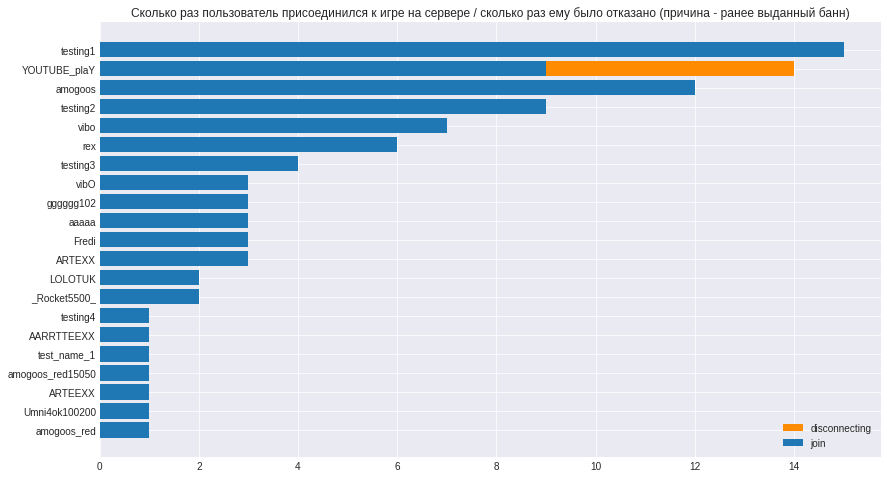

In [110]:
# vibo: data
groups_x = res_plot_df['user_name'].values[::-1]
values_y_auth = res_plot_df['count_auth'].values[::-1]
values_y_join = res_plot_df['count_join'].values[::-1]

# vibo: bar chart whith
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))
  ax.barh(groups_x, values_y_auth, label = "disconnecting", color='darkorange')
  ax.barh(groups_x, values_y_join, label = "join")

  plt.title(f'Сколько раз пользователь присоединился к игре на сервере / сколько раз ему было отказано (причина - ранее выданный банн)')
  ax.legend(loc='best')
  # ax.set_xlabel('Количество')
  # ax.set_ylabel('Имя пользователя')
  plt.show()

На графике виды заблокированные пользователи. Видим как пользователь прошел аутентификацию сервером и после проверки стоп-листа бы отключен от сервера (`disconnection`)

### **user left**

Когда пользователь покидает игру это событие фиксируется сообщением `left` с указанием имени пользователя. При некорректной остановке сервера лог не ведется, количество `left`-сообщений сервера меньше `join`-сообщений. Как видно выше имело место значительное количество некорректных остановок сервера.

In [179]:
sub_summary['is_user_left'] = sub_summary['serv_mess'].map(lambda x: 'left' in x)
ind_user_left = sub_summary[sub_summary['is_user_left'] == True].index
len(ind_user_left)

83

In [180]:
sub_summary[sub_summary.index.isin(ind_user_left)]

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_fell_out,is_lost_connection,reason_lost_connection,user_name
404,2023-02-13,21:57:51,Server thread,INFO,vibO left the game,False,True,False,False,NaN,NaN
573,2023-02-14,00:15:19,Server thread,INFO,vibO left the game,False,True,False,False,NaN,NaN
925,2023-02-14,23:58:51,Server thread,INFO,vibO left the game.,False,True,False,False,NaN,NaN
1100,2023-02-17,19:07:04,Server thread,INFO,YOUTUBE_plaY left the game,False,True,False,False,NaN,NaN
1132,2023-02-17,19:34:51,Server thread,INFO,vibo left the game,False,True,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6281,2023-03-09,21:25:30,Server thread,INFO,_Rocket5500_ left the game,False,True,False,False,NaN,NaN
6539,2023-03-09,17:59:49,Server thread,INFO,ARTEXX left the game,False,True,False,False,NaN,NaN
6545,2023-03-09,18:02:56,Server thread,INFO,ARTEEXX left the game,False,True,False,False,NaN,NaN
6552,2023-03-09,18:04:34,Server thread,INFO,AARRTTEEXX left the game,False,True,False,False,NaN,NaN


In [181]:
plot_df = sub_summary[sub_summary.index.isin(ind_user_left)]
plot_df['user_name'] = plot_df['serv_mess'].map(lambda x: x.split()[0])
plot_df = plot_df[['date', 'time', 'user_name']]
plot_df

<ipython-input-181-339be6699b0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['user_name'] = plot_df['serv_mess'].map(lambda x: x.split()[0])


,date,time,user_name
404,2023-02-13,21:57:51,vibO
573,2023-02-14,00:15:19,vibO
925,2023-02-14,23:58:51,vibO
1100,2023-02-17,19:07:04,YOUTUBE_plaY
1132,2023-02-17,19:34:51,vibo
...,...,...,...
6281,2023-03-09,21:25:30,_Rocket5500_
6539,2023-03-09,17:59:49,ARTEXX
6545,2023-03-09,18:02:56,ARTEEXX
6552,2023-03-09,18:04:34,AARRTTEEXX


Сколько раз выходили

In [182]:
plot_df[['date', 'user_name', 'time']].groupby(['date', 'user_name'])['time'].count()

date         user_name       
2023-02-13   vibO                 1
2023-02-14   vibO                 2
2023-02-17   YOUTUBE_plaY         5
             vibo                 3
2023-03-03   LOLOTUK              2
             YOUTUBE_plaY         1
             rex                  3
2023-03-04   rex                  3
2023-03-05   YOUTUBE_plaY         2
             amogoos              6
             amogoos_red          1
             amogoos_red15050     1
             gggggg102            1
             testing1             1
             vibo                 2
2023-03-06   amogoos              2
             testing1            12
             testing2             7
             testing3             1
             testing4             1
2023-03-07   Fredi                3
             amogoos              3
             gggggg102            2
             test_name_1          1
             testing1             1
2023-03-08   Umni4ok100200        1
             aaaaa                

In [183]:
plot_df_is_left = plot_df.groupby(['date'])['date'].count().to_frame(name='count_left').reset_index()
plot_df_is_left

,date,count_left
0,2023-02-13,1
1,2023-02-14,2
2,2023-02-17,8
3,2023-03-03,6
4,2023-03-04,3
5,2023-03-05,14
6,2023-03-06,23
7,2023-03-07,10
8,2023-03-08,10
9,2023-03-09,6


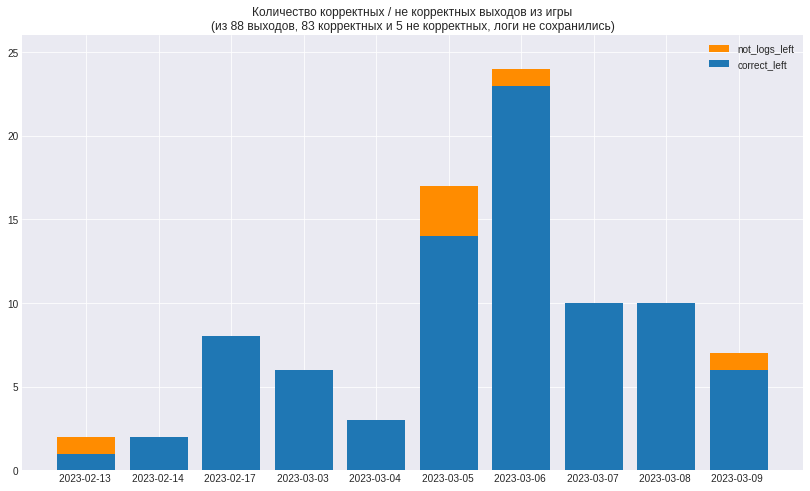

In [184]:
# vibo: data
groups_x = plot_df_is_left['date'].values
values_y = plot_df_is_left['count_left'].values

# vibo: bar chart whith total value labels
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))
  ax.bar(groups_x_join_day, values_y_join_day, label = "not_logs_left", color='darkorange')
  ax.bar(groups_x, values_y, label = "correct_left")

  # for i, total in enumerate(values_y):
  #   ax.text(i, total + 0.5, values_y[i], ha='center')
  
  # plt.axhline(y=med_join, color='red', linestyle='--', linewidth=1, label=f'median - {med_join}')

  plt.title(f'Количество корректных / не корректных выходов из игры\n(из {sum(values_y_join_day)} выходов, {sum(values_y)} корректных и {sum(values_y_join_day) - sum(values_y)} не корректных, логи не сохранились)')
  ax.legend(loc='best')
  # ax.set_xlabel('Дата')
  ax.set_ylim(0, 26)
  # ax.set_ylabel('Количество')
  plt.show()

Здесь видно, что несколько раз сеанс игры завершился без корректного выхода (сохранения).

In [185]:
groups_x_cor_left = groups_x.copy()
values_y_corr_left = values_y.copy()

In [186]:
groups_x_cor_left

array(['2023-02-13 ', '2023-02-14 ', '2023-02-17 ', '2023-03-03 ',
       '2023-03-04 ', '2023-03-05 ', '2023-03-06 ', '2023-03-07 ',
       '2023-03-08 ', '2023-03-09 '], dtype=object)

In [187]:
values_y_corr_left

array([ 1,  2,  8,  6,  3, 14, 23, 10, 10,  6])

In [188]:
plot_df = plot_df[['date', 'user_name', 'time']].groupby(['date', 'user_name'])['time'].count().to_frame(name='count_left').reset_index()
plot_df

,date,user_name,count_left
0,2023-02-13,vibO,1
1,2023-02-14,vibO,2
2,2023-02-17,YOUTUBE_plaY,5
3,2023-02-17,vibo,3
4,2023-03-03,LOLOTUK,2
5,2023-03-03,YOUTUBE_plaY,1
6,2023-03-03,rex,3
7,2023-03-04,rex,3
8,2023-03-05,YOUTUBE_plaY,2
9,2023-03-05,amogoos,6


In [189]:
plot_df = plot_df[['user_name', 'count_left']].groupby(['user_name'])['count_left'].sum().to_frame(name='count_left')
plot_df = plot_df.reset_index()
plot_df

,user_name,count_left
0,AARRTTEEXX,1
1,ARTEEXX,1
2,ARTEXX,2
3,Fredi,3
4,LOLOTUK,2
5,Umni4ok100200,1
6,YOUTUBE_plaY,8
7,_Rocket5500_,2
8,aaaaa,3
9,amogoos,11


In [190]:
# vibo: объединяем для построения графика
res_plot_df = res_plot_df.merge(plot_df)
res_plot_df

,user_name,count_join,count_auth,count_left,is_join_eq_left
0,testing1,15,15,14,1
1,YOUTUBE_plaY,9,14,8,1
2,amogoos,12,12,11,1
3,testing2,9,9,9,0
4,vibo,7,7,6,1
5,rex,6,6,6,0
6,testing3,4,4,4,0
7,vibO,3,3,3,0
8,gggggg102,3,3,3,0
9,aaaaa,3,3,3,0


In [191]:
res_plot_df['is_join_eq_left'] = res_plot_df['count_join'] - res_plot_df['count_left']
res_plot_df

,user_name,count_join,count_auth,count_left,is_join_eq_left
0,testing1,15,15,14,1
1,YOUTUBE_plaY,9,14,8,1
2,amogoos,12,12,11,1
3,testing2,9,9,9,0
4,vibo,7,7,6,1
5,rex,6,6,6,0
6,testing3,4,4,4,0
7,vibO,3,3,3,0
8,gggggg102,3,3,3,0
9,aaaaa,3,3,3,0


Смотрим на пользователей у которых количество входов не равняется количеству выходов из игры.

In [192]:
list(res_plot_df[res_plot_df['is_join_eq_left'] != 0]['user_name'].values)

['testing1', 'YOUTUBE_plaY', 'amogoos', 'vibo', 'ARTEXX']

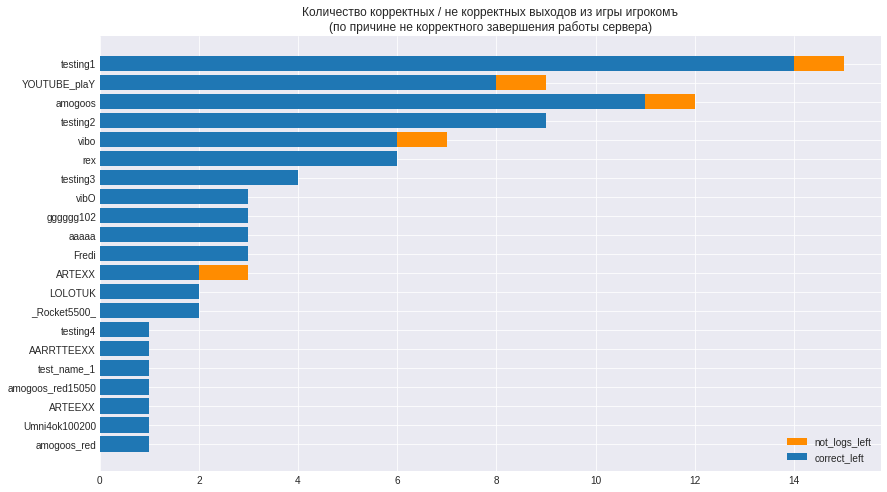

In [193]:
# vibo: data
groups_x = res_plot_df['user_name'].values[::-1]
values_y_join = res_plot_df['count_join'].values[::-1]
values_y_left = res_plot_df['count_left'].values[::-1]

# vibo: bar chart whith
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))
  ax.barh(groups_x, values_y_join, label = "not_logs_left", color='darkorange')
  ax.barh(groups_x, values_y_left, label = "correct_left")

  plt.title(f'Количество корректных / не корректных выходов из игры игрокомъ\n(по причине не корректного завершения работы сервера)')
  ax.legend(loc='best')
  # ax.set_xlabel('Количество входов/выходов')
  # ax.set_ylabel('Имя пользователя')
  plt.show()

Ниже выведен результат по фильтру `join` + `left`. Количество `join` и `left` сходится с тем, которое нашли выше. 

In [194]:
data_logs['is_join'] = data_logs['serv_mess'].dropna().map(lambda x: 'join' in x)
ind_is_join = data_logs[data_logs['is_join'] == True].index
data_logs['is_left'] = data_logs['serv_mess'].dropna().map(lambda x: ('left' in x) or ('fell out' in x))
ind_is_left = data_logs[data_logs['is_left'] == True].index
data_logs[data_logs.index.isin(sorted(list(ind_is_join) + list(ind_is_left)))]

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess,is_join,is_left
394,2023-02-13,21:49:48,Server thread,INFO,vibO joined the game,NaN,NaN,NaN,NaN,NaN,True,False
404,2023-02-13,21:57:51,Server thread,INFO,vibO left the game,NaN,NaN,NaN,NaN,NaN,False,True
567,2023-02-13,22:01:25,Server thread,INFO,vibO joined the game,NaN,NaN,NaN,NaN,NaN,True,False
573,2023-02-14,00:15:19,Server thread,INFO,vibO left the game,NaN,NaN,NaN,NaN,NaN,False,True
915,2023-02-14,23:53:33,Server thread,INFO,vibO joined the game,NaN,NaN,NaN,NaN,NaN,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6547,2023-03-09,18:04:00,Server thread,INFO,AARRTTEEXX joined the game,NaN,NaN,NaN,NaN,NaN,True,False
6552,2023-03-09,18:04:34,Server thread,INFO,AARRTTEEXX left the game,NaN,NaN,NaN,NaN,NaN,False,True
6554,2023-03-09,18:16:03,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN,NaN,NaN,True,False
6576,2023-03-09,18:45:12,Server thread,INFO,ARTEXX left the game,NaN,NaN,NaN,NaN,NaN,False,True


Посмотрим на нашего игрока внимательнее

In [195]:
name = 'testing1'
df_find_lost = data_logs[data_logs.index.isin(sorted(list(ind_is_join) + list(ind_is_left)))]
df_find_lost['is_lost'] = df_find_lost['serv_mess'].dropna().map(lambda x: name in x)
ind_is_lost = df_find_lost[df_find_lost['is_lost'] == True].index
df_find_lost[df_find_lost.index.isin(ind_is_lost)]

<ipython-input-195-abae6084c989>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_find_lost['is_lost'] = df_find_lost['serv_mess'].dropna().map(lambda x: name in x)


,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess,is_join,is_left,is_lost
3561,2023-03-05,15:27:14,Server thread,INFO,testing1 joined the game,NaN,NaN,NaN,NaN,NaN,True,False,True
3595,2023-03-05,15:40:48,Server thread,INFO,testing1 left the game,NaN,NaN,NaN,NaN,NaN,False,True,True
3890,2023-03-06,20:13:50,Server thread,INFO,testing1 joined the game,NaN,NaN,NaN,NaN,NaN,True,False,True
3899,2023-03-06,20:23:52,Server thread,INFO,testing1 left the game.,NaN,NaN,NaN,NaN,NaN,False,True,True
3900,2023-03-06,20:23:52,Server thread,INFO,testing1 joined the game,NaN,NaN,NaN,NaN,NaN,True,False,True
3904,2023-03-06,20:24:00,Server thread,INFO,testing1 left the game.,NaN,NaN,NaN,NaN,NaN,False,True,True
3905,2023-03-06,20:24:00,Server thread,INFO,testing1 joined the game,NaN,NaN,NaN,NaN,NaN,True,False,True
3909,2023-03-06,20:24:58,Server thread,INFO,testing1 left the game.,NaN,NaN,NaN,NaN,NaN,False,True,True
3910,2023-03-06,20:24:58,Server thread,INFO,testing1 joined the game,NaN,NaN,NaN,NaN,NaN,True,False,True
3914,2023-03-06,20:25:03,Server thread,INFO,testing1 left the game.,NaN,NaN,NaN,NaN,NaN,False,True,True


In [196]:
data_logs.loc[4295:4507]

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess,is_join,is_left
4295,2023-03-06,21:21:12,Server thread,INFO,testing1 joined the game,NaN,NaN,NaN,NaN,NaN,True,False
4296,2023-03-06,21:21:12,Server thread,INFO,testing1[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN,NaN,NaN,False,False
4297,2023-03-06,21:29:00,Server thread,INFO,testing1 issued server command: //set oak_planks,NaN,NaN,NaN,NaN,NaN,False,False
4299,2023-03-06,22:46:40,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN,False,False
4300,2023-03-06,22:46:41,ServerMain,INFO,Environment: authHost='https://authserver.moj...,NaN,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4503,2023-03-06,22:47:02,Server thread,INFO,NaN,NaN,NaN,NaN,HolographicDisplays,Found a new version available: v3.0.1,NaN,NaN
4504,2023-03-06,22:47:02,Server thread,INFO,NaN,NaN,NaN,NaN,HolographicDisplays,Download it on Bukkit Dev:,NaN,NaN
4505,2023-03-06,22:47:02,Server thread,INFO,NaN,NaN,NaN,NaN,HolographicDisplays,https://dev.bukkit.org/projects/holographic-di...,NaN,NaN
4506,2023-03-06,22:49:30,User Authenticator,INFO,UUID of player testing1 is 4e9071c3-79ab-3a3a...,1.0,NaN,NaN,NaN,NaN,False,False


Еще есть сообщение `fell out`, когда вы еще на сервере, но вылетели из игры, т.к. кто-то с правом оператора сервера (op) выполнил команду kill user_name. Но это сообщение уже относится к игровым моментам.

In [197]:
sub_summary['is_fell_out'] = sub_summary['serv_mess'].map(lambda x: 'fell out' in x)
ind_fell_out = sub_summary[sub_summary['is_fell_out'] == True].index
len(ind_fell_out)

6

Узнаем кому так повезло

In [198]:
sub_summary[sub_summary.index.isin(ind_fell_out)]

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_fell_out,is_lost_connection,reason_lost_connection,user_name
3304,2023-03-05,14:54:55,Server thread,INFO,vibo fell out of the world,False,False,True,False,NaN,NaN
4254,2023-03-06,21:02:12,Server thread,INFO,testing2 fell out of the world,False,False,True,False,NaN,NaN
5768,2023-03-08,19:58:07,Server thread,INFO,testing2 fell out of the world,False,False,True,False,NaN,NaN
5774,2023-03-08,19:59:10,Server thread,INFO,testing2 fell out of the world,False,False,True,False,NaN,NaN
5788,2023-03-08,20:04:55,Server thread,INFO,testing2 fell out of the world,False,False,True,False,NaN,NaN
6245,2023-03-09,18:45:09,Server thread,INFO,_Rocket5500_ fell out of the world,False,False,True,False,NaN,NaN


In [199]:
data_logs.loc[3304:6500]

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess,is_join,is_left
3304,2023-03-05,14:54:55,Server thread,INFO,vibo fell out of the world,NaN,NaN,NaN,NaN,NaN,False,True
3305,2023-03-05,14:54:55,Server thread,INFO,[amogoos: Killed vibo],NaN,NaN,NaN,NaN,NaN,False,False
3306,2023-03-05,14:55:47,Server thread,INFO,amogoos has made the advancement [Stone Age],NaN,NaN,NaN,NaN,NaN,False,False
3308,2023-03-05,14:58:43,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN,False,False
3309,2023-03-05,14:58:44,ServerMain,INFO,Environment: authHost='https://authserver.moj...,NaN,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6496,2023-03-09,17:56:38,Worker-Main,INFO,Preparing spawn area: 0%,NaN,5.0,NaN,NaN,NaN,False,False
6497,2023-03-09,17:56:38,Worker-Main,INFO,Preparing spawn area: 0%,NaN,5.0,NaN,NaN,NaN,False,False
6498,2023-03-09,17:56:38,Worker-Main,INFO,Preparing spawn area: 0%,NaN,4.0,NaN,NaN,NaN,False,False
6499,2023-03-09,17:56:38,Worker-Main,INFO,Preparing spawn area: 0%,NaN,4.0,NaN,NaN,NaN,False,False


Перед тем как игрок покидает игру в логах есть сообщение `lost connection`, которое имеет свое пояснение. Посмотрим нa эти сообщения.

In [200]:
sub_summary['is_lost_connection'] = sub_summary['serv_mess'].map(lambda x: 'lost connection' in x)
ind_lost_connection = sub_summary[sub_summary['is_lost_connection'] == True].index
len(ind_lost_connection)

83

In [201]:
sub_summary[sub_summary.index.isin(ind_lost_connection)]

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_fell_out,is_lost_connection,reason_lost_connection,user_name
403,2023-02-13,21:57:51,Server thread,INFO,vibO lost connection: Disconnected,False,False,False,True,Disconnected,vibO
572,2023-02-14,00:15:19,Server thread,INFO,vibO lost connection: Disconnected,False,False,False,True,Disconnected,vibO
924,2023-02-14,23:58:51,Server thread,INFO,vibO lost connection: Server closed,False,False,False,True,Server closed,vibO
1099,2023-02-17,19:07:04,Server thread,INFO,YOUTUBE_plaY lost connection: Disconnected,False,False,False,True,Disconnected,YOUTUBE_plaY
1131,2023-02-17,19:34:51,Server thread,INFO,vibo lost connection: Disconnected,False,False,False,True,Disconnected,vibo
...,...,...,...,...,...,...,...,...,...,...,...
6280,2023-03-09,21:25:30,Server thread,INFO,_Rocket5500_ lost connection: Disconnected,False,False,False,True,Disconnected,_Rocket5500_
6538,2023-03-09,17:59:49,Server thread,INFO,ARTEXX lost connection: Disconnected,False,False,False,True,Disconnected,ARTEXX
6544,2023-03-09,18:02:55,Server thread,INFO,ARTEEXX lost connection: Disconnected,False,False,False,True,Disconnected,ARTEEXX
6551,2023-03-09,18:04:34,Server thread,INFO,AARRTTEEXX lost connection: Disconnected,False,False,False,True,Disconnected,AARRTTEEXX


Вынесем в один столбец причину по которой игрок покинул сервер

In [202]:
sub_summary['reason_lost_connection'] = sub_summary[sub_summary.index.isin(ind_lost_connection)]['serv_mess'].map(lambda x: ' '.join(x.split()[3:]))
sub_summary['user_name'] = sub_summary[sub_summary.index.isin(ind_lost_connection)]['serv_mess'].map(lambda x: x.split()[0])
sub_summary[sub_summary['is_lost_connection'] == True]

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_fell_out,is_lost_connection,reason_lost_connection,user_name
403,2023-02-13,21:57:51,Server thread,INFO,vibO lost connection: Disconnected,False,False,False,True,Disconnected,vibO
572,2023-02-14,00:15:19,Server thread,INFO,vibO lost connection: Disconnected,False,False,False,True,Disconnected,vibO
924,2023-02-14,23:58:51,Server thread,INFO,vibO lost connection: Server closed,False,False,False,True,Server closed,vibO
1099,2023-02-17,19:07:04,Server thread,INFO,YOUTUBE_plaY lost connection: Disconnected,False,False,False,True,Disconnected,YOUTUBE_plaY
1131,2023-02-17,19:34:51,Server thread,INFO,vibo lost connection: Disconnected,False,False,False,True,Disconnected,vibo
...,...,...,...,...,...,...,...,...,...,...,...
6280,2023-03-09,21:25:30,Server thread,INFO,_Rocket5500_ lost connection: Disconnected,False,False,False,True,Disconnected,_Rocket5500_
6538,2023-03-09,17:59:49,Server thread,INFO,ARTEXX lost connection: Disconnected,False,False,False,True,Disconnected,ARTEXX
6544,2023-03-09,18:02:55,Server thread,INFO,ARTEEXX lost connection: Disconnected,False,False,False,True,Disconnected,ARTEEXX
6551,2023-03-09,18:04:34,Server thread,INFO,AARRTTEEXX lost connection: Disconnected,False,False,False,True,Disconnected,AARRTTEEXX


In [203]:
sub_summary[sub_summary['is_lost_connection'] == True][['user_name', 'reason_lost_connection', 'serv_mess']].groupby(['user_name', 'reason_lost_connection']).count()

serv_mess
user_name        reason_lost_connection                                  
AARRTTEEXX       Disconnected                                           1
ARTEEXX          Disconnected                                           1
ARTEXX           Disconnected                                           2
Fredi            Disconnected                                           3
LOLOTUK          Disconnected                                           2
Umni4ok100200    Disconnected                                           1
YOUTUBE_plaY     Disconnected                                           7
                 You are banned from this server                        1
_Rocket5500_     Disconnected                                           2
aaaaa            Disconnected                                           3
amogoos          Disconnected                                          10
                 You dropped your items too quickly (Hacking?)          1
amogoos_red      Disconnected                                           1
amogoos_red15050 Disconnected                                           1
gggggg102        Disconnected                                           3
rex              Disconnected                                           5
                 Server closed                                          1
test_name_1      Disconnected                                           1
testing1         Disconnected                                           9
                 Server closed                                          1
                 You logged in from another location                    4
testing2         Disconnected                                           8
                 Server closed                                          1
testing3         Disconnected                                           4
testing4         Disconnected                                           1
vibO             Disconnected                                           2
                 Server closed                                          1
vibo             Disconnected                                           5
                 You are banned from this server                        1

In [204]:
sub_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 9 to 6581
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    5003 non-null   object
 1   time                    5003 non-null   object
 2   serv_teg_inf            5003 non-null   object
 3   serv_teg                5003 non-null   object
 4   serv_mess               5003 non-null   object
 5   is_user_join            5003 non-null   bool  
 6   is_user_left            5003 non-null   bool  
 7   is_fell_out             5003 non-null   bool  
 8   is_lost_connection      5003 non-null   bool  
 9   reason_lost_connection  83 non-null     object
 10  user_name               83 non-null     object
dtypes: bool(4), object(7)
memory usage: 461.3+ KB


In [205]:
sub_summary['reason_lost_connection'].describe()

count               83
unique               5
top       Disconnected
freq                72
Name: reason_lost_connection, dtype: object

In [206]:
plot_df = sub_summary[sub_summary['is_lost_connection'] == True][['reason_lost_connection', 'is_lost_connection']].groupby(['reason_lost_connection']).count().reset_index()
plot_df['%'] = plot_df['is_lost_connection'] * 100 / plot_df['is_lost_connection'].sum()
plot_df['%'] = plot_df['%'].round(2)
plot_df = plot_df.sort_values('is_lost_connection', ascending=False)
plot_df

,reason_lost_connection,is_lost_connection,%
0,Disconnected,72,86.75
1,Server closed,4,4.82
4,You logged in from another location,4,4.82
2,You are banned from this server,2,2.41
3,You dropped your items too quickly (Hacking?),1,1.20


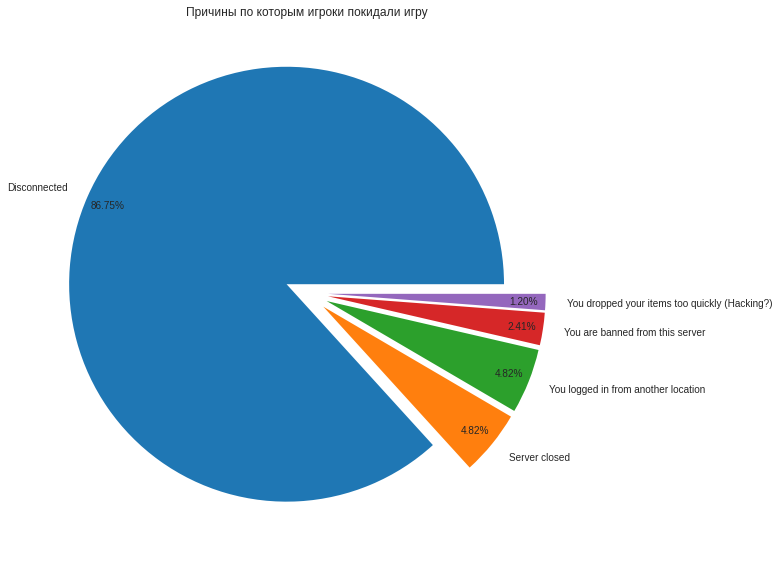

In [207]:
sort_labels = list(plot_df['reason_lost_connection'].values)

labels = plot_df['reason_lost_connection'].values
value = plot_df['is_lost_connection'].values

# vibo: pie chart
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(10, 10))
  explode = [0.1, 0.1, 0.1, 0.1, 0.1]
  ax.pie(value, labels=labels, pctdistance=0.9, explode=explode, autopct='%1.2f%%', labeldistance=1.1)

  plt.title(f'Причины по которым игроки покидали игру')
  # ax.legend(loc='best')
  plt.show()

Итого возможные варианты покидания сервера игроком (на текущий момент):
* `Disconnected` - стандартный выход из игры;
* `Server closed` - при штатной остановке сервера, если в этот момент игрок играл на сервере;
* `You are banned from this server` - если игрока забаннили;
* `You dropped your items too quickly (Hacking?)` - подозрение в хаккинге;
* `You logged in from another location` - повторная авторизация с другого компьютера.

In [208]:
sub_summary

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_fell_out,is_lost_connection,reason_lost_connection,user_name
9,2023-02-13,21:34:07,Server thread,INFO,Starting minecraft server version 1.19.2,False,False,False,False,NaN,NaN
10,2023-02-13,21:34:07,Server thread,INFO,Loading properties,False,False,False,False,NaN,NaN
11,2023-02-13,21:34:07,Server thread,INFO,This server is running CraftBukkit version 36...,False,False,False,False,NaN,NaN
12,2023-02-13,21:34:07,Server thread,INFO,Debug logging is disabled,False,False,False,False,NaN,NaN
13,2023-02-13,21:34:07,Server thread,INFO,Server Ping Player Sample Count: 12,False,False,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6576,2023-03-09,18:45:12,Server thread,INFO,ARTEXX left the game,False,True,False,False,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,True,False,False,False,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,False,False,False,False,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,False,False,False,False,NaN,NaN


In [209]:
sub_summary.loc[5080:5090]

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_fell_out,is_lost_connection,reason_lost_connection,user_name
5080,2023-03-07,19:15:32,Server thread,INFO,Fredi has made the advancement [Monster Hunter],False,False,False,False,NaN,NaN
5081,2023-03-07,19:16:12,Server thread,INFO,Fredi lost connection: Disconnected,False,False,False,True,Disconnected,Fredi
5082,2023-03-07,19:16:12,Server thread,INFO,Fredi left the game,False,True,False,False,NaN,NaN
5084,2023-03-07,20:14:05,Server thread,INFO,amogoos joined the game,True,False,False,False,NaN,NaN
5085,2023-03-07,20:14:06,Server thread,INFO,amogoos[/[0:0:0:0:0:0:0:1,False,False,False,False,NaN,NaN
5086,2023-03-07,20:14:40,Server thread,WARN,amogoos dropped their items too quickly!,False,False,False,False,NaN,NaN
5087,2023-03-07,20:14:40,Server thread,INFO,amogoos lost connection: You dropped your ite...,False,False,False,True,You dropped your items too quickly (Hacking?),amogoos
5088,2023-03-07,20:14:40,Server thread,INFO,amogoos left the game.,False,True,False,False,NaN,NaN
5090,2023-03-07,20:14:45,Server thread,INFO,amogoos joined the game,True,False,False,False,NaN,NaN


In [210]:
plot_df = sub_summary[sub_summary['is_lost_connection'] == True][['user_name', 'reason_lost_connection', 'serv_mess']].groupby(['user_name', 'reason_lost_connection']).count()
plot_df = plot_df.reset_index()
# plot_df.unstack('reason_lost_connection')
plot_df

,user_name,reason_lost_connection,serv_mess
0,AARRTTEEXX,Disconnected,1
1,ARTEEXX,Disconnected,1
2,ARTEXX,Disconnected,2
3,Fredi,Disconnected,3
4,LOLOTUK,Disconnected,2
5,Umni4ok100200,Disconnected,1
6,YOUTUBE_plaY,Disconnected,7
7,YOUTUBE_plaY,You are banned from this server,1
8,_Rocket5500_,Disconnected,2
9,aaaaa,Disconnected,3


In [211]:
plot_df_discon = plot_df[plot_df['reason_lost_connection'] == 'Disconnected']
plot_df_discon

,user_name,reason_lost_connection,serv_mess
0,AARRTTEEXX,Disconnected,1
1,ARTEEXX,Disconnected,1
2,ARTEXX,Disconnected,2
3,Fredi,Disconnected,3
4,LOLOTUK,Disconnected,2
5,Umni4ok100200,Disconnected,1
6,YOUTUBE_plaY,Disconnected,7
8,_Rocket5500_,Disconnected,2
9,aaaaa,Disconnected,3
10,amogoos,Disconnected,10


In [212]:
tot_res_df = res_plot_df.copy()
tot_res_df

,user_name,count_join,count_auth,count_left,is_join_eq_left
0,testing1,15,15,14,1
1,YOUTUBE_plaY,9,14,8,1
2,amogoos,12,12,11,1
3,testing2,9,9,9,0
4,vibo,7,7,6,1
5,rex,6,6,6,0
6,testing3,4,4,4,0
7,vibO,3,3,3,0
8,gggggg102,3,3,3,0
9,aaaaa,3,3,3,0


In [213]:
tot_res_df = tot_res_df.merge(plot_df_discon, how='outer')
tot_res_df = tot_res_df.rename(columns={'serv_mess': 'disconnected'})
tot_res_df = tot_res_df.drop(['reason_lost_connection'], axis=1)
tot_res_df

,user_name,count_join,count_auth,count_left,is_join_eq_left,disconnected
0,testing1,15,15,14,1,9
1,YOUTUBE_plaY,9,14,8,1,7
2,amogoos,12,12,11,1,10
3,testing2,9,9,9,0,8
4,vibo,7,7,6,1,5
5,rex,6,6,6,0,5
6,testing3,4,4,4,0,4
7,vibO,3,3,3,0,2
8,gggggg102,3,3,3,0,3
9,aaaaa,3,3,3,0,3


In [214]:
plot_df_serv_closed = plot_df[plot_df['reason_lost_connection'] == 'Server closed']
plot_df_serv_closed

,user_name,reason_lost_connection,serv_mess
16,rex,Server closed,1
19,testing1,Server closed,1
22,testing2,Server closed,1
26,vibO,Server closed,1


In [215]:
tot_res_df = tot_res_df.merge(plot_df_serv_closed, how='outer')
tot_res_df = tot_res_df.rename(columns={'serv_mess': 'server_closed'})
tot_res_df = tot_res_df.drop(['reason_lost_connection'], axis=1)
tot_res_df

,user_name,count_join,count_auth,count_left,is_join_eq_left,disconnected,server_closed
0,testing1,15,15,14,1,9,1.0
1,YOUTUBE_plaY,9,14,8,1,7,NaN
2,amogoos,12,12,11,1,10,NaN
3,testing2,9,9,9,0,8,1.0
4,vibo,7,7,6,1,5,NaN
5,rex,6,6,6,0,5,1.0
6,testing3,4,4,4,0,4,NaN
7,vibO,3,3,3,0,2,1.0
8,gggggg102,3,3,3,0,3,NaN
9,aaaaa,3,3,3,0,3,NaN


In [216]:
plot_df_another_loc = plot_df[plot_df['reason_lost_connection'] == 'You logged in from another location']
plot_df_another_loc

,user_name,reason_lost_connection,serv_mess
20,testing1,You logged in from another location,4


In [217]:
tot_res_df = tot_res_df.merge(plot_df_another_loc, how='outer')
tot_res_df = tot_res_df.rename(columns={'serv_mess': 'another_location'})
tot_res_df = tot_res_df.drop(['reason_lost_connection'], axis=1)
tot_res_df

,user_name,count_join,count_auth,count_left,is_join_eq_left,disconnected,server_closed,another_location
0,testing1,15,15,14,1,9,1.0,4.0
1,YOUTUBE_plaY,9,14,8,1,7,NaN,NaN
2,amogoos,12,12,11,1,10,NaN,NaN
3,testing2,9,9,9,0,8,1.0,NaN
4,vibo,7,7,6,1,5,NaN,NaN
5,rex,6,6,6,0,5,1.0,NaN
6,testing3,4,4,4,0,4,NaN,NaN
7,vibO,3,3,3,0,2,1.0,NaN
8,gggggg102,3,3,3,0,3,NaN,NaN
9,aaaaa,3,3,3,0,3,NaN,NaN


In [218]:
plot_df_bann = plot_df[plot_df['reason_lost_connection'] == 'You are banned from this server']
plot_df_bann

,user_name,reason_lost_connection,serv_mess
7,YOUTUBE_plaY,You are banned from this server,1
28,vibo,You are banned from this server,1


In [219]:
tot_res_df = tot_res_df.merge(plot_df_bann, how='outer')
tot_res_df = tot_res_df.rename(columns={'serv_mess': 'bann'})
tot_res_df = tot_res_df.drop(['reason_lost_connection'], axis=1)
tot_res_df

,user_name,count_join,count_auth,count_left,is_join_eq_left,disconnected,server_closed,another_location,bann
0,testing1,15,15,14,1,9,1.0,4.0,NaN
1,YOUTUBE_plaY,9,14,8,1,7,NaN,NaN,1.0
2,amogoos,12,12,11,1,10,NaN,NaN,NaN
3,testing2,9,9,9,0,8,1.0,NaN,NaN
4,vibo,7,7,6,1,5,NaN,NaN,1.0
5,rex,6,6,6,0,5,1.0,NaN,NaN
6,testing3,4,4,4,0,4,NaN,NaN,NaN
7,vibO,3,3,3,0,2,1.0,NaN,NaN
8,gggggg102,3,3,3,0,3,NaN,NaN,NaN
9,aaaaa,3,3,3,0,3,NaN,NaN,NaN


In [220]:
plot_df_hacking = plot_df[plot_df['reason_lost_connection'] == 'You dropped your items too quickly (Hacking?)']
plot_df_hacking

,user_name,reason_lost_connection,serv_mess
11,amogoos,You dropped your items too quickly (Hacking?),1


In [221]:
tot_res_df = tot_res_df.merge(plot_df_hacking, how='outer')
tot_res_df = tot_res_df.rename(columns={'serv_mess': 'hacking'})
tot_res_df = tot_res_df.drop(['reason_lost_connection'], axis=1)
tot_res_df

,user_name,count_join,count_auth,count_left,is_join_eq_left,disconnected,server_closed,another_location,bann,hacking
0,testing1,15,15,14,1,9,1.0,4.0,NaN,NaN
1,YOUTUBE_plaY,9,14,8,1,7,NaN,NaN,1.0,NaN
2,amogoos,12,12,11,1,10,NaN,NaN,NaN,1.0
3,testing2,9,9,9,0,8,1.0,NaN,NaN,NaN
4,vibo,7,7,6,1,5,NaN,NaN,1.0,NaN
5,rex,6,6,6,0,5,1.0,NaN,NaN,NaN
6,testing3,4,4,4,0,4,NaN,NaN,NaN,NaN
7,vibO,3,3,3,0,2,1.0,NaN,NaN,NaN
8,gggggg102,3,3,3,0,3,NaN,NaN,NaN,NaN
9,aaaaa,3,3,3,0,3,NaN,NaN,NaN,NaN


In [222]:
tot_res_df = tot_res_df[['user_name', 'count_auth', 'count_join', 'count_left', 'disconnected', 'server_closed', 'another_location', 'bann', 'hacking']]
tot_res_df = tot_res_df.fillna(0)
tot_res_df

,user_name,count_auth,count_join,count_left,disconnected,server_closed,another_location,bann,hacking
0,testing1,15,15,14,9,1.0,4.0,0.0,0.0
1,YOUTUBE_plaY,14,9,8,7,0.0,0.0,1.0,0.0
2,amogoos,12,12,11,10,0.0,0.0,0.0,1.0
3,testing2,9,9,9,8,1.0,0.0,0.0,0.0
4,vibo,7,7,6,5,0.0,0.0,1.0,0.0
5,rex,6,6,6,5,1.0,0.0,0.0,0.0
6,testing3,4,4,4,4,0.0,0.0,0.0,0.0
7,vibO,3,3,3,2,1.0,0.0,0.0,0.0
8,gggggg102,3,3,3,3,0.0,0.0,0.0,0.0
9,aaaaa,3,3,3,3,0.0,0.0,0.0,0.0


In [223]:
plot_df = tot_res_df[['user_name', 'disconnected', 'server_closed', 'another_location', 'bann', 'hacking']]
plot_df

,user_name,disconnected,server_closed,another_location,bann,hacking
0,testing1,9,1.0,4.0,0.0,0.0
1,YOUTUBE_plaY,7,0.0,0.0,1.0,0.0
2,amogoos,10,0.0,0.0,0.0,1.0
3,testing2,8,1.0,0.0,0.0,0.0
4,vibo,5,0.0,0.0,1.0,0.0
5,rex,5,1.0,0.0,0.0,0.0
6,testing3,4,0.0,0.0,0.0,0.0
7,vibO,2,1.0,0.0,0.0,0.0
8,gggggg102,3,0.0,0.0,0.0,0.0
9,aaaaa,3,0.0,0.0,0.0,0.0


In [268]:
plot_df[['disconnected', 'server_closed', 'another_location', 'bann', 'hacking']] = plot_df[['disconnected', 'server_closed', 'another_location', 'bann', 'hacking']].astype(int)
plot_df

<ipython-input-268-a98499608276>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df[['disconnected', 'server_closed', 'another_location', 'bann', 'hacking']] = plot_df[['disconnected', 'server_closed', 'another_location', 'bann', 'hacking']].astype(int)


,user_name,disconnected,server_closed,another_location,bann,hacking
0,testing1,9,1,4,0,0
1,YOUTUBE_plaY,7,0,0,1,0
2,amogoos,10,0,0,0,1
3,testing2,8,1,0,0,0
4,vibo,5,0,0,1,0
5,rex,5,1,0,0,0
6,testing3,4,0,0,0,0
7,vibO,2,1,0,0,0
8,gggggg102,3,0,0,0,0
9,aaaaa,3,0,0,0,0


In [270]:
plot_df = plot_df[::-1]

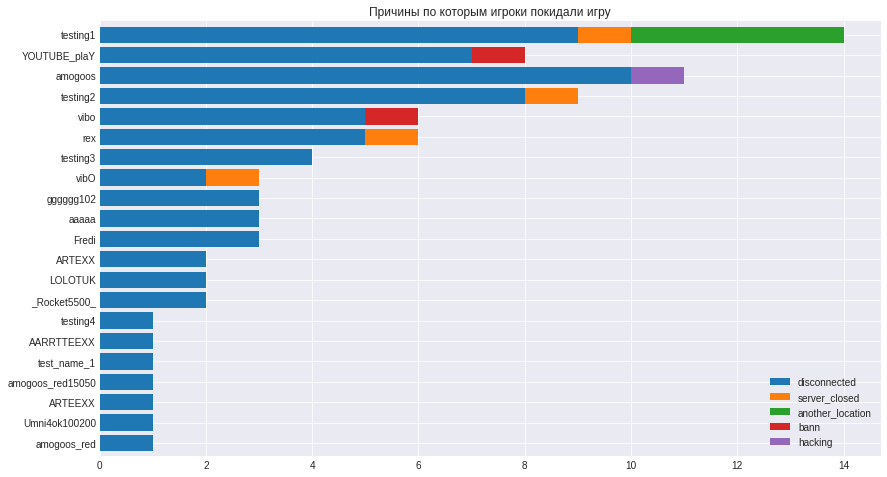

In [278]:
# vibo: data
groups_x = plot_df['user_name'].values
sort_labels = ['disconnected', 'server_closed', 'another_location', 'bann', 'hacking']

# vibo: stacked bar chart (pandas default -> plot_df.plot.bar)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  plot_df.plot.barh(x='user_name', stacked=True, width=0.8, figsize=(14, 8))

  plt.title(f'Причины по которым игроки покидали игру')
  plt.legend(loc='best')
  plt.ylabel('')
  plt.show()

In [279]:
# vibo: сохраняемся
sub_summary.to_csv('/content/drive/MyDrive/minecraft/sub_summary_server_thread.csv')

### **Операторы сервера**

Продолжаем выделять информацию из дополнительного сообщения сервера, посмотрим, кто из пользователей был наделен правом оператора сервера.

In [280]:
summary['is_op'] = summary['serv_mess'].map(lambda x: 'server operator' in x).to_frame()
summary[summary['is_op'] == True][['date', 'time', 'serv_mess', 'is_op']]

,date,time,serv_mess,is_op
400,2023-02-13,21:57:06,Made vibO a server operator,True
1104,2023-02-17,19:10:02,Made YOUTUBE_plaY a server operator,True
1159,2023-02-17,19:45:04,Made vibo a server operator,True
1384,2023-03-03,18:03:24,Made LOLOTUK a server operator,True
1629,2023-03-03,19:42:04,Made rex a server operator,True
3180,2023-03-05,12:57:45,Made amogoos a server operator,True
3205,2023-03-05,13:13:49,Made amogoos a server operator,True
3580,2023-03-05,15:33:25,Made testing1 a server operator,True
3920,2023-03-06,20:26:21,Made testing2 a server operator,True
4265,2023-03-06,21:04:44,Made testing3 a server operator,True


In [281]:
ind_op = summary[summary['is_op'] == True].index
ind_op

Int64Index([ 400, 1104, 1159, 1384, 1629, 3180, 3205, 3580, 3920, 4265, 4981,
            5004, 5387, 5634, 5647, 6241, 6276, 6277, 6278, 6560],
           dtype='int64')

In [282]:
summary[summary.index.isin(ind_op)][['date', 'time', 'serv_mess', 'is_op']]

,date,time,serv_mess,is_op
400,2023-02-13,21:57:06,Made vibO a server operator,True
1104,2023-02-17,19:10:02,Made YOUTUBE_plaY a server operator,True
1159,2023-02-17,19:45:04,Made vibo a server operator,True
1384,2023-03-03,18:03:24,Made LOLOTUK a server operator,True
1629,2023-03-03,19:42:04,Made rex a server operator,True
3180,2023-03-05,12:57:45,Made amogoos a server operator,True
3205,2023-03-05,13:13:49,Made amogoos a server operator,True
3580,2023-03-05,15:33:25,Made testing1 a server operator,True
3920,2023-03-06,20:26:21,Made testing2 a server operator,True
4265,2023-03-06,21:04:44,Made testing3 a server operator,True


In [283]:
# vibo: выделим имя оператора сервера
summary['op_name'] = summary[summary.index.isin(ind_op)]['serv_mess'].map(lambda x: x.split()[1])
summary[summary['is_op'] == True][['date', 'time', 'serv_mess', 'is_op', 'op_name']]

,date,time,serv_mess,is_op,op_name
400,2023-02-13,21:57:06,Made vibO a server operator,True,vibO
1104,2023-02-17,19:10:02,Made YOUTUBE_plaY a server operator,True,YOUTUBE_plaY
1159,2023-02-17,19:45:04,Made vibo a server operator,True,vibo
1384,2023-03-03,18:03:24,Made LOLOTUK a server operator,True,LOLOTUK
1629,2023-03-03,19:42:04,Made rex a server operator,True,rex
3180,2023-03-05,12:57:45,Made amogoos a server operator,True,amogoos
3205,2023-03-05,13:13:49,Made amogoos a server operator,True,amogoos
3580,2023-03-05,15:33:25,Made testing1 a server operator,True,testing1
3920,2023-03-06,20:26:21,Made testing2 a server operator,True,testing2
4265,2023-03-06,21:04:44,Made testing3 a server operator,True,testing3


In [284]:
# vibo: уникальные пользователи, получившие права оператора сервера
sorted(list(summary[summary['is_op'] == True]['op_name'].unique()))

['ARTEXX',
 'Fredi',
 'LOLOTUK',
 'Umni4ok100200',
 'YOUTUBE_plaY',
 '_Rocket5500_',
 'aaaaa',
 'amogoos',
 'rex',
 'testing1',
 'testing2',
 'testing3',
 'vibO',
 'vibo']

In [285]:
# vibo: количество уникальных пользователей, получивших права оператора сервера
len(list(summary[summary['is_op'] == True]['op_name'].unique()))

14

In [286]:
# vibo: когда были выданы права администратора
summary[summary['is_op'] == True].groupby(['date', 'time', 'op_name'])[['op_name']].size()

date         time      op_name      
2023-02-13   21:57:06  vibO             1
2023-02-17   19:10:02  YOUTUBE_plaY     1
             19:45:04  vibo             1
2023-03-03   18:03:24  LOLOTUK          1
             19:42:04  rex              1
2023-03-05   12:57:45  amogoos          1
             13:13:49  amogoos          1
             15:33:25  testing1         1
2023-03-06   20:26:21  testing2         1
             21:04:44  testing3         1
2023-03-07   14:49:00  Fredi            1
             18:01:36  Fredi            1
2023-03-08   14:28:35  Umni4ok100200    1
             16:58:22  aaaaa            1
             17:02:38  aaaaa            1
2023-03-09   18:19:51  ARTEXX           1
             18:43:23  _Rocket5500_     1
             21:24:05  _Rocket5500_     1
             21:24:38  _Rocket5500_     1
             21:24:50  _Rocket5500_     1
dtype: int64

### Игровой таймлайн

In [287]:
# vibo: читаем
sub_summary = pd.read_csv('/content/drive/MyDrive/minecraft/sub_summary_server_thread.csv', index_col=0)

In [288]:
sub_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 9 to 6581
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    5003 non-null   object
 1   time                    5003 non-null   object
 2   serv_teg_inf            5003 non-null   object
 3   serv_teg                5003 non-null   object
 4   serv_mess               5003 non-null   object
 5   is_user_join            5003 non-null   bool  
 6   is_user_left            5003 non-null   bool  
 7   is_fell_out             5003 non-null   bool  
 8   is_lost_connection      5003 non-null   bool  
 9   reason_lost_connection  83 non-null     object
 10  user_name               83 non-null     object
dtypes: bool(4), object(7)
memory usage: 332.2+ KB


In [289]:
sub_summary

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_fell_out,is_lost_connection,reason_lost_connection,user_name
9,2023-02-13,21:34:07,Server thread,INFO,Starting minecraft server version 1.19.2,False,False,False,False,NaN,NaN
10,2023-02-13,21:34:07,Server thread,INFO,Loading properties,False,False,False,False,NaN,NaN
11,2023-02-13,21:34:07,Server thread,INFO,This server is running CraftBukkit version 36...,False,False,False,False,NaN,NaN
12,2023-02-13,21:34:07,Server thread,INFO,Debug logging is disabled,False,False,False,False,NaN,NaN
13,2023-02-13,21:34:07,Server thread,INFO,Server Ping Player Sample Count: 12,False,False,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6576,2023-03-09,18:45:12,Server thread,INFO,ARTEXX left the game,False,True,False,False,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,True,False,False,False,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,False,False,False,False,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,False,False,False,False,NaN,NaN


In [290]:
# vibo: делаем столбец для перехода в pd.to_datetime
sub_summary['date_time'] = sub_summary['date'] + ' ' + sub_summary['time']
sub_summary

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_fell_out,is_lost_connection,reason_lost_connection,user_name,date_time
9,2023-02-13,21:34:07,Server thread,INFO,Starting minecraft server version 1.19.2,False,False,False,False,NaN,NaN,2023-02-13 21:34:07
10,2023-02-13,21:34:07,Server thread,INFO,Loading properties,False,False,False,False,NaN,NaN,2023-02-13 21:34:07
11,2023-02-13,21:34:07,Server thread,INFO,This server is running CraftBukkit version 36...,False,False,False,False,NaN,NaN,2023-02-13 21:34:07
12,2023-02-13,21:34:07,Server thread,INFO,Debug logging is disabled,False,False,False,False,NaN,NaN,2023-02-13 21:34:07
13,2023-02-13,21:34:07,Server thread,INFO,Server Ping Player Sample Count: 12,False,False,False,False,NaN,NaN,2023-02-13 21:34:07
...,...,...,...,...,...,...,...,...,...,...,...,...
6576,2023-03-09,18:45:12,Server thread,INFO,ARTEXX left the game,False,True,False,False,NaN,NaN,2023-03-09 18:45:12
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,True,False,False,False,NaN,NaN,2023-03-09 18:50:50
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,False,False,False,False,NaN,NaN,2023-03-09 18:50:50
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,False,False,False,False,NaN,NaN,2023-03-09 18:52:31


In [291]:
# vibo: преобразовываем тип данных столбца, проверяем
sub_summary['date_time'] = pd.to_datetime(sub_summary['date_time'])
sub_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 9 to 6581
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    5003 non-null   object        
 1   time                    5003 non-null   object        
 2   serv_teg_inf            5003 non-null   object        
 3   serv_teg                5003 non-null   object        
 4   serv_mess               5003 non-null   object        
 5   is_user_join            5003 non-null   bool          
 6   is_user_left            5003 non-null   bool          
 7   is_fell_out             5003 non-null   bool          
 8   is_lost_connection      5003 non-null   bool          
 9   reason_lost_connection  83 non-null     object        
 10  user_name               83 non-null     object        
 11  date_time               5003 non-null   datetime64[ns]
dtypes: bool(4), datetime64[ns](1), object(7)
memory 

In [292]:
sub_summary[sub_summary['date'] == '2023-03-06']

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_fell_out,is_lost_connection,reason_lost_connection,user_name,date_time


**Старт сервера**

In [293]:
df_is_start = sub_summary['serv_mess'].map(lambda x: 'Starting minecraft server' in x).to_frame(name='is_start')
ind_is_start = df_is_start[df_is_start['is_start'] == True].index
len(ind_is_start)

27

**Сервер запущен**

In [294]:
df_done = sub_summary['serv_mess'].map(lambda x: 'Done' in x).to_frame(name='done')
ind_done = df_done[df_done['done'] == True].index
len(ind_done)

27

**Игрок присоединился к серверу**

In [295]:
ind_user_join = sub_summary[sub_summary['is_user_join'] == True].index
len(ind_user_join)

88

**С игроком потеряно соединение**

In [296]:
ind_lost_connection = sub_summary[sub_summary['is_lost_connection'] == True].index
len(ind_lost_connection)

83

По причине:

In [297]:
sub_summary[sub_summary.index.isin(ind_lost_connection)]

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_fell_out,is_lost_connection,reason_lost_connection,user_name,date_time
403,2023-02-13,21:57:51,Server thread,INFO,vibO lost connection: Disconnected,False,False,False,True,Disconnected,vibO,2023-02-13 21:57:51
572,2023-02-14,00:15:19,Server thread,INFO,vibO lost connection: Disconnected,False,False,False,True,Disconnected,vibO,2023-02-14 00:15:19
924,2023-02-14,23:58:51,Server thread,INFO,vibO lost connection: Server closed,False,False,False,True,Server closed,vibO,2023-02-14 23:58:51
1099,2023-02-17,19:07:04,Server thread,INFO,YOUTUBE_plaY lost connection: Disconnected,False,False,False,True,Disconnected,YOUTUBE_plaY,2023-02-17 19:07:04
1131,2023-02-17,19:34:51,Server thread,INFO,vibo lost connection: Disconnected,False,False,False,True,Disconnected,vibo,2023-02-17 19:34:51
...,...,...,...,...,...,...,...,...,...,...,...,...
6280,2023-03-09,21:25:30,Server thread,INFO,_Rocket5500_ lost connection: Disconnected,False,False,False,True,Disconnected,_Rocket5500_,2023-03-09 21:25:30
6538,2023-03-09,17:59:49,Server thread,INFO,ARTEXX lost connection: Disconnected,False,False,False,True,Disconnected,ARTEXX,2023-03-09 17:59:49
6544,2023-03-09,18:02:55,Server thread,INFO,ARTEEXX lost connection: Disconnected,False,False,False,True,Disconnected,ARTEEXX,2023-03-09 18:02:55
6551,2023-03-09,18:04:34,Server thread,INFO,AARRTTEEXX lost connection: Disconnected,False,False,False,True,Disconnected,AARRTTEEXX,2023-03-09 18:04:34


**Игрок покинул сервер**

In [298]:
ind_user_left = sub_summary[sub_summary['is_user_left'] == True].index
len(ind_user_left)

83

**Игрок выпал из мира**

In [299]:
ind_fell_out = sub_summary[sub_summary['is_fell_out'] == True].index
len(ind_fell_out)

6

**Остановка сервера**

In [300]:
df_is_stop = sub_summary['serv_mess'].map(lambda x: 'Stopping the server' in x).to_frame(name='is_stop')
ind_is_stop = df_is_stop[df_is_stop['is_stop'] == True].index
len(ind_is_stop)

11

**Успешное сохранение состояния**

In [301]:
df_save_is_ok = sub_summary['serv_mess'].map(lambda x: 'All dimensions are saved' in x).to_frame(name='save_is_ok')
ind_save_is_ok = df_save_is_ok[df_save_is_ok['save_is_ok'] == True].index
len(ind_save_is_ok)

11

### А что еще?

In [302]:
summary

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,is_op,op_name
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN,False,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN,False,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN,False,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN,False,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,5.0,NaN,NaN,False,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN,False,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN,False,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN,False,NaN


Информации в `serv_mess` много, вот, например, что можно:
* вывести время загрузки сервера от старта до метки `Done` (например, `66.075s`);
* найти время работы сервера (между `Starting minecraft server` и `Stopping server`);
* найти время игры каждого пользователя (`vibO joined the game` и `vibO left the game`);
* найти сколько раз игрок погибал и по какой причине (застрелен скелетом, утонул и т.д.);
* найти время 'жизни' персонажа в реальном времение между началом игры и смертью;
* найти кто к кому телепортируется и таким образом строить граф взаимодействия между игроками.